<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/ir-basic/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###High Variance : too smart model
Overfitting, High Train Error/High Test Error   
###High Bias : stupid model
Overfitting, Low Train Error/High Test Error   
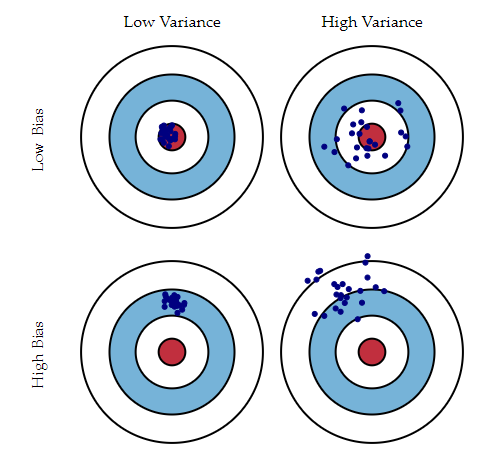
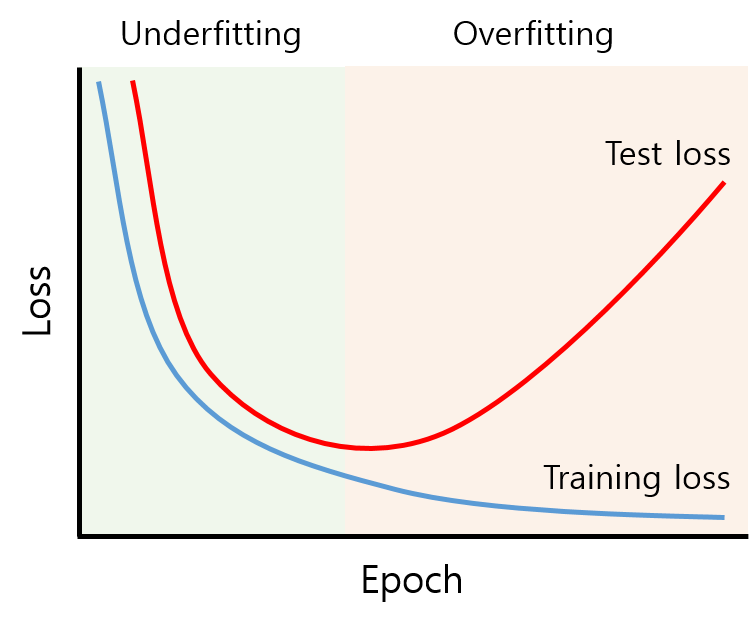

## Load Dataset

In [1]:
import pandas as pd

In [6]:
train = pd.read_csv("./train.csv", index_col = "id")
print(train.shape)
train.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


## Preprocessing

In [10]:
label_name = "target"
feature_names = train.columns.difference([label_name])

print(len(feature_names))
feature_names[0:5]

93


Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13'], dtype='object')

### Train
X: train 데이터의 feature   
y: train 데이터의 label/Class

In [12]:
X = train[feature_names]
print(X.shape)
X.head()

(61878, 93)


,feat_1,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_2,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_3,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_4,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,...,feat_58,feat_59,feat_6,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_7,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_8,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_9,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5,0,0,0,...,0,0,0,11,0,1,1,0,1,0,7,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,6,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,7,2,2,0,0,0,0,58,0,10,0,0,0,0,0,3,0,1,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,2,1,5,0,0,5,4,0,0,2,1,0,1,0,0,1,0,1,2,2,0,22,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [14]:
y = train[label_name]
print(y.unique())
print(y.shape)

y.head()

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
(61878,)


id
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
Name: target, dtype: object

###  Use Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
 
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [16]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [17]:
y_predict = model.predict(X)
y_predict

array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [18]:
# 같은 데이터 셋으로 학습및 예측했기 떄문에 정확도 100이 나옴
accuracy = (y == y_predict).mean()
accuracy

1.0

### Hold-out Validation

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

43314 43314
18564 18564


In [25]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [27]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#accuracy 
train_score = (y_train == y_train_predict).mean()
test_score = (y_test == y_test_predict).mean()

f"train = {train_score:.6f}, test = {test_score:.6f}"

'train = 1.000000, test = 0.709869'

In [56]:
#modulise test,train predict score
def predictscore(model_) :
  model = model_
  model.fit(X_train, y_train)
  
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  train_score = (y_train == y_train_predict).mean()
  test_score = (y_test == y_test_predict).mean()

  return train_score,test_score


## Hyperparameter Setting
* max_depth
* min_samples_split
* min_samples_leaf

#### max_depth

In [57]:
max_depth_list = range(2,51)
history = []

for max_depth in max_depth_list : 
  model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)

  train_score,test_score  = predictscore(model)
  print(f"max_depth = {max_depth}, train = {train_score:.6f}, test = {test_score:.6f}")
    
  history.append({
      'max_depth' : max_depth,
      'train' : train_score,
      'test' : test_score
 })

history = pd.DataFrame(history)
history.head()

max_depth = 2, train = 0.439950, test = 0.438160
max_depth = 3, train = 0.477375, test = 0.477537
max_depth = 4, train = 0.527982, test = 0.524402
max_depth = 5, train = 0.529090, test = 0.525479
max_depth = 6, train = 0.558849, test = 0.555591
max_depth = 7, train = 0.568638, test = 0.570297
max_depth = 8, train = 0.605301, test = 0.599224
max_depth = 9, train = 0.634345, test = 0.628528
max_depth = 10, train = 0.660895, test = 0.652984
max_depth = 11, train = 0.676964, test = 0.662034
max_depth = 12, train = 0.691855, test = 0.672969
max_depth = 13, train = 0.716720, test = 0.690853
max_depth = 14, train = 0.733019, test = 0.699580
max_depth = 15, train = 0.747079, test = 0.701896
max_depth = 16, train = 0.763772, test = 0.705882
max_depth = 17, train = 0.780094, test = 0.713963
max_depth = 18, train = 0.795239, test = 0.715956
max_depth = 19, train = 0.810269, test = 0.716171
max_depth = 20, train = 0.824445, test = 0.717787
max_depth = 21, train = 0.839313, test = 0.722474
max_dept

,max_depth,train,test
0,2,0.439950,0.438160
1,3,0.477375,0.477537
2,4,0.527982,0.524402
3,5,0.529090,0.525479
4,6,0.558849,0.555591


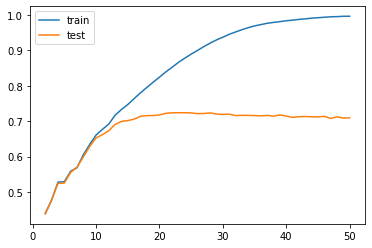

In [58]:
# max_detpt에 따른 정확도 계산
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(history['max_depth'], history['train'], label='train')
plt.plot(history['max_depth'], history['test'], label='test')

plt.legend()

#### min_samples_split

In [60]:
min_samples_split_list = range(10, 301, 10)
history = []

for min_samples_split in min_samples_split_list : 
  model = DecisionTreeClassifier(min_samples_split= min_samples_split, random_state=24)
  train_score,test_score = predictscore(model)
  
  print(f"min_samples_split = {min_samples_split}, train = {train_score:.6f}, test = {test_score:.6f}")
    
  history.append({
       'min_samples_split' : min_samples_split,
       'train' : train_score,
       'test' : test_score
  })

history = pd.DataFrame(history)
history.head()


min_samples_split = 10, train = 0.912107, test = 0.715040
min_samples_split = 20, train = 0.866833, test = 0.714771
min_samples_split = 30, train = 0.842014, test = 0.714016
min_samples_split = 40, train = 0.825622, test = 0.716387
min_samples_split = 50, train = 0.812347, test = 0.716279
min_samples_split = 60, train = 0.803228, test = 0.716117
min_samples_split = 70, train = 0.794154, test = 0.717518
min_samples_split = 80, train = 0.788821, test = 0.718003
min_samples_split = 90, train = 0.784412, test = 0.720265
min_samples_split = 100, train = 0.779702, test = 0.719942
min_samples_split = 110, train = 0.776377, test = 0.720965
min_samples_split = 120, train = 0.772314, test = 0.720157
min_samples_split = 130, train = 0.769082, test = 0.720373
min_samples_split = 140, train = 0.767188, test = 0.719672
min_samples_split = 150, train = 0.764834, test = 0.719457
min_samples_split = 160, train = 0.760909, test = 0.717679
min_samples_split = 170, train = 0.758485, test = 0.718326
min_sa

,min_samples_split,train_score,test_score
0,10,0.912107,0.715040
1,20,0.866833,0.714771
2,30,0.842014,0.714016
3,40,0.825622,0.716387
4,50,0.812347,0.716279


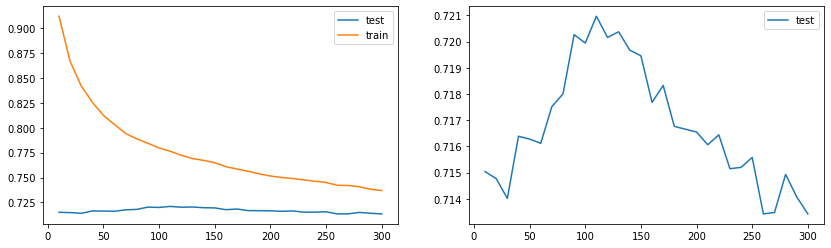

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
plt.plot(history['min_samples_split'], history['test'], label='test')
plt.plot(history['min_samples_split'], history['train'], label='train')

plt.legend()

plt.subplot(1,2,2)
plt.plot(history['min_samples_split'], history['test'], label='test')

plt.legend()

#### min_samples_leaf

In [66]:
min_samples_leaf_list = range(1,101,2)

history = []

for min_samples_leaf in min_samples_leaf_list : 
  model = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, random_state=42)

  train_score,test_score = predictscore(model)
  print(f"min_samples_leaf={min_samples_leaf}, train = {train_score:.6f}, test = {test_score:.6f}")

  history.append({
      'min_samples_leaf' : min_samples_leaf,
      'train' : train_score,
      'test' : test_score
  })

history = pd.DataFrame(history)
history.head()

min_samples_leaf=1, train = 1.000000, test = 0.709869
min_samples_leaf=3, train = 0.898716, test = 0.712346
min_samples_leaf=5, train = 0.854158, test = 0.713208
min_samples_leaf=7, train = 0.827723, test = 0.719242
min_samples_leaf=9, train = 0.811562, test = 0.719565
min_samples_leaf=11, train = 0.799972, test = 0.719080
min_samples_leaf=13, train = 0.789006, test = 0.718056
min_samples_leaf=15, train = 0.781133, test = 0.720373
min_samples_leaf=17, train = 0.773791, test = 0.718864
min_samples_leaf=19, train = 0.768043, test = 0.717787
min_samples_leaf=21, train = 0.762617, test = 0.719672
min_samples_leaf=23, train = 0.758323, test = 0.717572
min_samples_leaf=25, train = 0.755091, test = 0.715902
min_samples_leaf=27, train = 0.751697, test = 0.715740
min_samples_leaf=29, train = 0.747472, test = 0.714986
min_samples_leaf=31, train = 0.745440, test = 0.713478
min_samples_leaf=33, train = 0.742947, test = 0.715471
min_samples_leaf=35, train = 0.740015, test = 0.714393
min_samples_lea

,min_samples_leaf,train,test
0,1,1.000000,0.709869
1,3,0.898716,0.712346
2,5,0.854158,0.713208
3,7,0.827723,0.719242
4,9,0.811562,0.719565


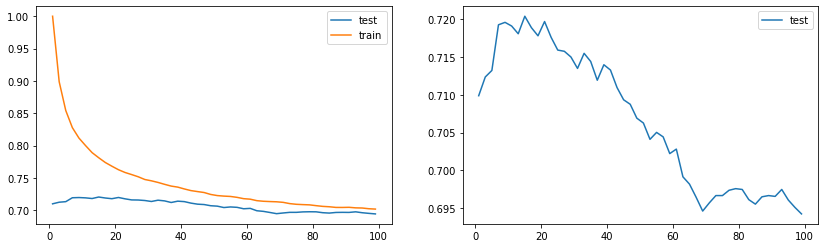

In [68]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
plt.plot(history['min_samples_leaf'], history['test'], label='test')
plt.plot(history['min_samples_leaf'], history['train'], label='train')

plt.legend()

plt.subplot(1,2,2)
plt.plot(history['min_samples_leaf'], history['test'], label='test')

plt.legend()